In [18]:
!pip install folium

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import folium
import joblib

# 2. Load Dataset
# Replace the path below with your uploaded file in Colab

In [20]:
df = pd.read_csv('/content/ev_synthetic_10000.csv')
print("Dataset shape:",df.shape)
df.head()

Dataset shape: (10000, 10)


,location_id,city,latitude,longitude,population_density,traffic_density,current_charging_stations,EV_sales_growth_rate,avg_income_level,projected_demand
0,LOC00001,Coimbatore,11.005628,76.911782,2550,8.52,1,0.21,471687,522
1,LOC00002,Jaipur,26.923668,75.805106,3190,27.69,1,5.25,569117,1037
2,LOC00003,Kolkata,22.590574,88.321150,3277,20.69,1,12.81,695624,1213
3,LOC00004,Coimbatore,11.033614,76.923419,629,12.91,1,20.03,507963,899
4,LOC00005,Nagpur,21.124859,79.106828,2310,29.60,1,3.80,1027673,1030


In [21]:
df["estimated_capicity"] = df["current_charging_stations"]*200
df["demand_gap"]=df["projected_demand"]-df["estimated_capicity"]



4. Exploratory Data Analysis (EDA)

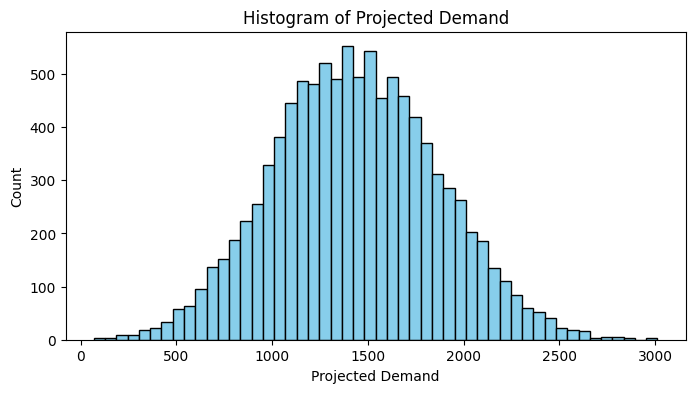

In [22]:
plt.figure(figsize=(8,4))
plt.hist(df["projected_demand"], bins=50,color ='skyblue',edgecolor = 'black')
plt.xlabel("Projected Demand")
plt.ylabel("Count")
plt.title("Histogram of Projected Demand")
plt.show()

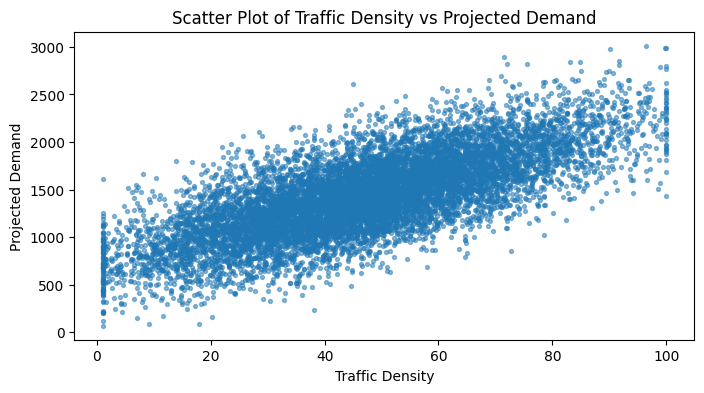

In [23]:
plt.figure(figsize=(8,4))
plt.scatter(df["traffic_density"],df["projected_demand"], s=8, alpha=0.5)
plt.xlabel("Traffic Density")
plt.ylabel("Projected Demand")
plt.title("Scatter Plot of Traffic Density vs Projected Demand")
plt.show()

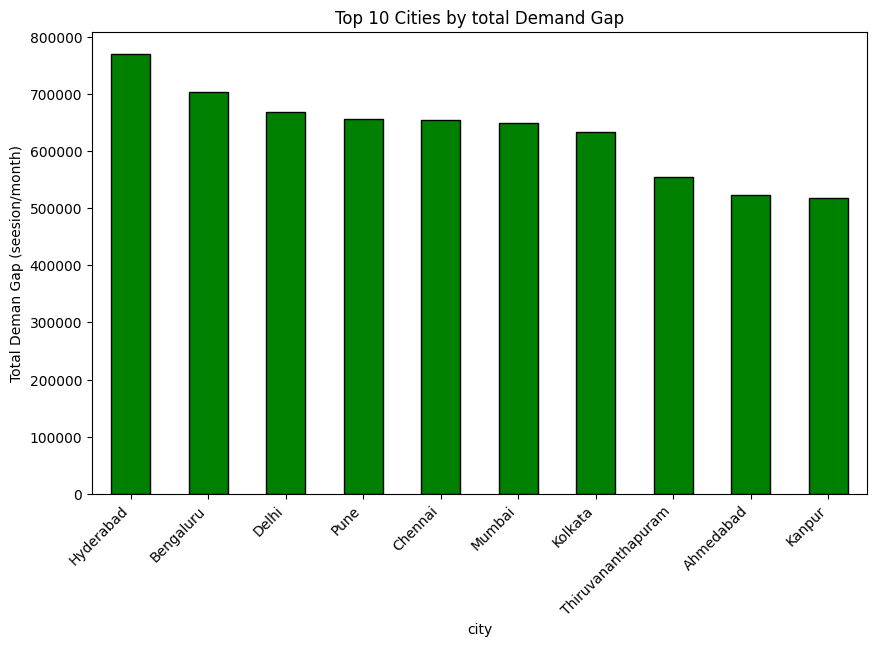

In [24]:
city_gap = df.groupby("city")["demand_gap"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
city_gap.plot(kind="bar", color = "green", edgecolor ="black")
plt.xticks(rotation=45,ha="right")
plt.ylabel("Total Deman Gap (seesion/month)")
plt.title("Top 10 Cities by total Demand Gap")
plt.show()


In [25]:

coords = df[["latitude","longitude","projected_demand"]].copy()
coords["demand_scaled"] = (coords["projected_demand"] - coords["projected_demand"].min()) / (coords["projected_demand"].max() - coords["projected_demand"].min())
x_cluster = coords[["latitude","longitude","demand_scaled"]].values

kmeans = KMeans(n_clusters=12, random_state=42, n_init=10)
coords["cluster"] = kmeans.fit_predict(x_cluster)


print("Cluster sizes:\n", coords["cluster"].value_counts())

Cluster sizes:
 cluster
4     1530
9     1044
6     1036
1     1015
0      962
10     951
8      946
7      542
11     504
3      500
2      492
5      478
Name: count, dtype: int64


Cluster sizes:
 cluster
4     1530
9     1044
6     1036
1     1015
0      962
10     951
8      946
7      542
11     504
3      500
2      492
5      478
Name: count, dtype: int64


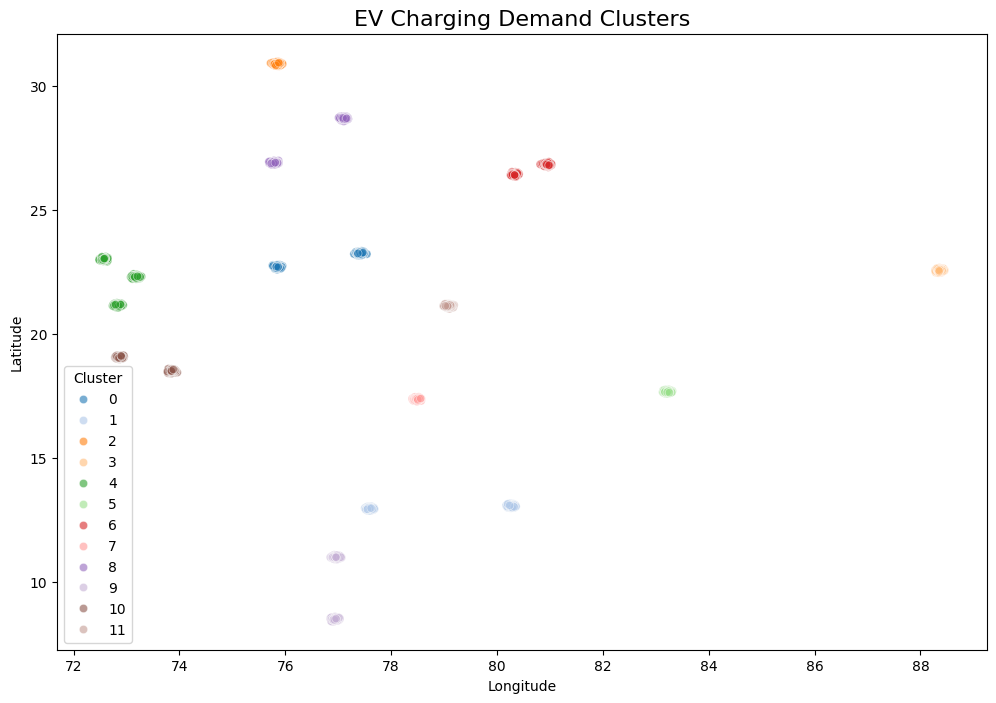

In [26]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Step 2: Prepare data
coords = df[["latitude", "longitude", "projected_demand"]].copy()

# Correct min-max scaling
coords["demand_scaled"] = (coords["projected_demand"] - coords["projected_demand"].min()) / \
                          (coords["projected_demand"].max() - coords["projected_demand"].min())

# Step 3: Prepare data for clustering
x_cluster = coords[["latitude", "longitude", "demand_scaled"]].values

# Step 4: Run K-Means
kmeans = KMeans(n_clusters=12, random_state=42, n_init=10)
coords["cluster"] = kmeans.fit_predict(x_cluster)

# Step 5: Print cluster sizes
print("Cluster sizes:\n", coords["cluster"].value_counts())

# Step 6: Plot clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='longitude',
    y='latitude',
    hue='cluster',         # color by cluster
    palette='tab20',       # 20 distinct colors
    data=coords,
    legend='full',
    alpha=0.6
)

plt.title('EV Charging Demand Clusters', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

In [27]:
features = ["population_density", "traffic_density", "current_charging_stations", "EV_sales_growth_rate", "avg_income_level"]
x = df[features]
y = df["projected_demand"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("y_pred",y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

y_pred [1806.81 1763.03 1433.41 ... 1241.93 1312.55 1097.93]
Mean Absolute Error: 111.7933
Mean Squared Error: 20234.902764899998
Root Mean Squared Error: 142.24943853984098
R-squared: 0.8959719434274589


In [28]:
importances = model.feature_importances_
fi_df = pd.DataFrame({"feature":features,"importance":importances}).sort_values("importance", ascending= False)
print("\nFeature Importance:\n", fi_df)



Feature Importance:
                      feature  importance
1            traffic_density    0.555789
0         population_density    0.180612
3       EV_sales_growth_rate    0.139900
2  current_charging_stations    0.071552
4           avg_income_level    0.052147


In [29]:
joblib.dump(model, "rf_ev_demand_model.joblib")

['rf_ev_demand_model.joblib']

In [30]:
top_locs = df.sort_values("projected_demand", ascending=False).head(200)
top_locs

,location_id,city,latitude,longitude,population_density,traffic_density,current_charging_stations,EV_sales_growth_rate,avg_income_level,projected_demand,estimated_capicity,demand_gap
1713,LOC01714,Hyderabad,17.365780,78.488108,4374,96.49,0,35.48,608870,3012,0,3012
3255,LOC03256,Kanpur,26.459040,80.326222,7886,99.75,1,14.49,765250,2990,200,2790
8331,LOC08332,Pune,18.523204,73.843188,8036,100.00,4,25.84,745777,2983,800,2183
2969,LOC02970,Pune,18.550649,73.845662,4941,90.19,2,32.15,631065,2973,400,2573
1405,LOC01406,Mumbai,19.122251,72.909451,7963,71.47,2,33.96,598494,2890,400,2490
...,...,...,...,...,...,...,...,...,...,...,...,...
4102,LOC04103,Bengaluru,12.928194,77.623635,5847,68.78,0,17.93,644808,2342,0,2342
8589,LOC08590,Chennai,13.105190,80.301768,5359,85.44,3,16.65,661088,2341,600,1741
8430,LOC08431,Jaipur,26.971872,75.808426,7752,61.16,2,22.45,643483,2341,400,1941
8088,LOC08089,Hyderabad,17.376654,78.523024,3281,58.93,1,31.00,776414,2341,200,2141


In [31]:
m = folium.Map(location=[22.0, 78.0], zoom_start=5)
for _, row in top_locs.iterrows():
  popup = f"{row['location_id']}<br>{row['city']}<br>Demad: {row['projected_demand']}<br> Stations: {row['current_charging_stations']}"
  folium.CircleMarker(location=[row["latitude"],row["longitude"]],
                      radius=4, popup=popup, color="red",fill=True, fill_opacity=0.6).add_to(m)



In [37]:
for i, c in enumerate(kmeans.cluster_centers_):
    lat_c, lon_c, _ = c
    folium.Marker(location=[lat_c, lon_c], popup=f"Cluster {i} center",
                  icon=folium.Icon(color="red", icon="info-sign")).add_to(m)

# Save map as HTML
m.save("ev_hotspots_map.html")
print("Map saved as ev_hotspots_map.html (download from Colab to view).")
m

Map saved as ev_hotspots_map.html (download from Colab to view).
